In [546]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_digits

In [547]:
class Perceptron:
    weights: np.array
    dimension: int
    confusion_matrix: np.array
    output: float
    
    def __init__(self,dimension: int):
        self.weights = np.zeros(dimension)
        self.dimension = dimension
    
    def get_output(self):
        return self.output
    
    def get_weights(self):
        return self.weights
    
    def loss_function(self,true_label: int,predicted_label: int):
        return max(0,(-true_label * predicted_label))
        
    def train_model(self,features: pd.DataFrame, labels: pd.DataFrame, max_iterations: int):
        itt = 0;
        column_name = labels.columns.tolist()
        
        while (itt < max_iterations):
            learning_rate = 0.001
        
            for (index_x, row_x), (index_y, row_y) in zip(features.iterrows(),labels.iterrows()):
                true_label = row_y[column_name[0]]
                x_i = np.array(row_x)
                weighted_sum = np.dot(self.weights,x_i)
                self.output = weighted_sum
                
                classification = 1 if weighted_sum > 0.5 else -1
                
                loss = self.loss_function(true_label, classification)
                if loss != 0:
                    self.weights += true_label * x_i * learning_rate
                    
            itt += 1
                
    def classify_samples(self, features: pd.DataFrame, labels: pd.DataFrame):
        self.confusion_matrix = np.zeros((2, 2))
        column_name = labels.columns.tolist()
        for (index_x, row_x), (index_y, row_y) in zip(features.iterrows(),labels.iterrows()):
            true_label = row_y[column_name[0]]
            x_i = np.array(row_x)
            weighted_sum = np.dot(self.weights,x_i)
            self.output = weighted_sum
            
            classification = 1 if weighted_sum > 0.5 else -1
            
            self.classify_inference(classification, true_label)
            
    def classify_inference(self, classification, true_class):
        if classification == true_class and classification == 1:
            self.confusion_matrix[0][0] += 1
            return
        if classification == true_class and classification == -1:
            self.confusion_matrix[1][1] += 1
            return
        if classification != true_class and classification == 1:
            self.confusion_matrix[1][0] += 1
            return
        if classification != true_class and classification == -1:
            self.confusion_matrix[0][1] += 1
            return
    
    def get_confusion_matrix(self):
        return self.confusion_matrix
    
    def split_dataset(self, dataset, proportion):
        train_data, test_data, _, _ = train_test_split(dataset,dataset,test_size=proportion,random_state=None)
        return train_data, test_data            

In [553]:
class MultPerceptron:
    perceptrons: list
    weighted_sum = 0.0
    output = 0.0
    confusion_matrix: np.array
        
    def __init__(self,n_perceptrons, n_features):
        self.perceptrons = [Perceptron(n_features) for _ in range(n_perceptrons)]
        self.confusion_matrix = np.zeros((n_perceptrons, n_perceptrons))
    
    def train_model(self,features: pd.DataFrame,labels: pd.DataFrame, max_iter: int, pct_selected: int): 
        self.perceptrons[pct_selected].train_model(features,labels,max_iter)
            
    def activation_function(self):
        numerator = pow(math.e,self.weighted_sum)-pow(math.e,-self.weighted_sum)
        denominator = pow(math.e,self.weighted_sum)+pow(math.e,-self.weighted_sum)
    
        return numerator / denominator
    
    def classify_sample(self, test: pd.DataFrame, label_name: str):
        test_len = len(test)
        classification = 0

        for row in range(test_len):
            max_proba = -1
            for i in range(10):
                sample = test.iloc[[row]]
        
                x = pd.DataFrame(data=sample.drop(columns=label_name))
                y = pd.DataFrame(data=sample[label_name])
                
                true_label = y[label_name].iloc[0]
                         
                self.perceptrons[i].classify_samples(x,y)
                self.weighted_sum = self.perceptrons[i].get_output()
                if self.weighted_sum > 0.5:
                    self.output = self.activation_function()
        
                    if self.output > max_proba:
                        classification = i
                        max_proba = self.output
            self.classify_inference(classification,true_label)
            
    def classify_inference(self,predicted_label,true_label):
        self.confusion_matrix[true_label,predicted_label] += 1
        
    def plot_confusion_matrix(self):
        cm = self.confusion_matrix
        cm = ConfusionMatrixDisplay(cm)
        
        cm.plot()
        plt.show()

In [554]:
def split_dataset(dataset, proportion):
    train_data, test_data, _, _ = train_test_split(dataset,dataset,test_size=proportion,random_state=None)
    return train_data, test_data     

In [555]:
digits = load_digits()

data = digits.data
label = digits.target

df = {str(x): [] for x in range(64)}
for row in data:
    for index, gs_number in enumerate(row):
        df[str(index)].append(gs_number)
df['target'] = label

df = pd.DataFrame(data=df)
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [558]:
train_data, test_data = split_dataset(df,0.3)
model = MultPerceptron(n_features=64,n_perceptrons=10)
       
x = pd.DataFrame(data=train_data.drop(columns = 'target'))
for i in range(10):
    y = pd.DataFrame(data=train_data['target'])
    y = y.applymap(lambda label: 1 if label == i else -1)
    
    model.train_model(x,y,max_iter=50,pct_selected=i) 

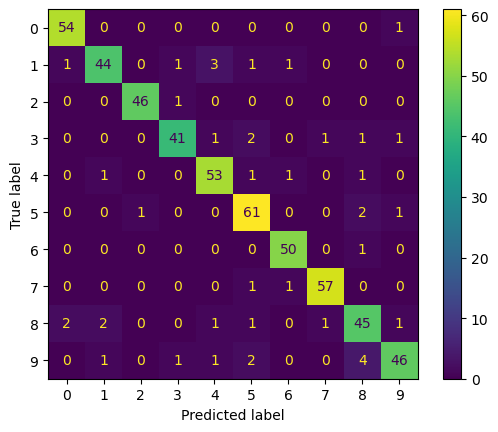

In [559]:
model.classify_sample(test_data,'target')
model.plot_confusion_matrix()

# Tentativas falhas de reduzir a quantidade de features

### Resultado: muita semelhança entre as features facilitando o erro

#### 1: Razão entre pixels claros e escuros nas partes superior e inferior da imagem
#### 2: Média de números em escala cinza nas partes inferior e superior da imagem

### Alternativa: remover pixels com 0 comuns a todos os dados

In [ ]:
df = {'bright_pixels': [], 'dark_pixels': [], 'target': []}

for row_d, row_t in zip(digits['data'], digits['target']):
    bright_pixels = 0
    dark_pixels = 0
    bright_dark_ratio_up = 0.0
    bright_dark_ratio_down = 0.0
    i = 0
    for gray_scale_number in row_d:
        if gray_scale_number == 0:
            dark_pixels += 1
        if gray_scale_number > 10:
            bright_pixels += 1
        if i == 31:
            bright_dark_ratio_up = bright_pixels/dark_pixels
            bright_pixels = 0
            dark_pixels = 0
        if i == 63:
            bright_dark_ratio_down = bright_pixels/dark_pixels
        i += 1
            
    df['bright_pixels'].append(bright_dark_ratio_up)
    df['dark_pixels'].append(bright_dark_ratio_down)
    df['target'].append(row_t) 

df = {'lower_part(%)': [], 'upper_part(%)': [], 'target': []}
i = 0
for row_d, row_t in zip(digits['data'],digits['target']):
    s_lower = 0
    s_upper = 0
    s_total = 0
    i = 0
    
    for gray_scale_number in row_d:
        s_total += gray_scale_number
        if i <32:
            s_upper += gray_scale_number
        else:
            s_lower += gray_scale_number
        i += 1
    
    df['lower_part(%)'].append(s_lower/s_total)
    df['upper_part(%)'].append(s_upper/s_total)
    df['target'].append(row_t)
